### Demo notebook for data management using Maup, based on Denver County, CO

In [1]:
import pandas as pd
import geopandas as gpd
import maup

maup.progress.enabled = True

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

### Goal: Add population data and election data from 2016 and 2018 to 2020 precincts.

### Here are the shapefiles that we'll need:

In [2]:
blocks_df = gpd.read_file("../examples/Shapefiles/DenverCo_blocks/DenverCo_blocks.shp")
precincts2016_df = gpd.read_file("../examples/Shapefiles/DenverCo_precincts2016_repaired/DenverCo_precincts2016_repaired.shp")
precincts2018_df = gpd.read_file("../examples/Shapefiles/DenverCo_precincts2018_repaired/DenverCo_precincts2018_repaired.shp")
precincts2020_df = gpd.read_file("../examples/Shapefiles/DenverCo_precincts2020_repaired/DenverCo_precincts2020_repaired.shp")


### Take a look at what information each of these shapefiles contains:

In [3]:
blocks_df

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,CD116,SLDL20,SLDU20,CD118,SLDL22,SLDU22,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,TOTPOP20,WHITE20,BLACK20,AMIN20,ASIAN20,NHPI20,OTHER20,2MORE20,HISP20,NH_WHITE20,NH_BLACK20,NH_AMIN20,NH_ASIAN20,NH_NHPI20,NH_OTHER20,NH_2MORE20,VAP20,HVAP20,WVAP20,BVAP20,AMINVAP20,ASIANVAP20,NHPIVAP20,OTHERVAP20,2MOREVAP20,H_WHITE20,H_BLACK20,H_AMIN20,H_ASIAN20,H_NHPI20,H_OTHER20,H_2MORE20,TOTPOP20R,HISP20R,NHWHITE20R,NHBLACK20R,NHAMIN20R,NHASIAN20R,NH_NHPI20R,NHOTHER20R,NH2MORE20R,WHITE20R,BLACK20R,AMIN20R,ASIAN20R,NHPI20R,OTHER20R,2MORE20R,geometry
0,08,031,000501,3004,080310005013004,Block 3004,1,4,34,1,4,34,G5040,S,11360,0,+39.7445040,-105.0362730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3130205.522 1696255.187, 3130218.309..."
1,08,031,004303,4019,080310043034019,Block 4019,1,6,31,1,2,31,G5040,S,17306,0,+39.7138779,-104.9322227,33,29,0,1,1,0,0,2,7,25,0,0,1,0,0,0,24,2,21,0,0,1,0,0,2,4,0,1,0,0,0,2,33,7,25,0,0,1,0,0,0,29,0,1,1,0,0,2,"POLYGON ((3159569.782 1685233.398, 3159568.175..."
2,08,031,005503,1008,080310055031008,Block 1008,1,1,16,1,1,26,G5040,S,17120,0,+39.6308773,-105.0296071,38,25,0,1,4,0,1,7,6,22,0,1,4,0,1,4,31,5,21,0,1,4,0,1,4,3,0,0,0,0,0,3,38,6,22,0,1,4,0,1,4,25,0,1,4,0,1,7,"POLYGON ((3132214.313 1655090.209, 3132219.592..."
3,08,031,003204,1004,080310032041004,Block 1004,1,8,31,1,6,31,G5040,S,15648,0,+39.7376302,-104.9689993,108,88,1,0,0,0,7,12,16,85,1,0,0,0,0,6,101,16,85,1,0,0,0,7,8,3,0,0,0,0,7,6,108,16,85,1,0,0,0,0,6,88,1,0,0,0,7,12,"POLYGON ((3149182.154 1694282.223, 3149242.061..."
4,08,031,003101,1022,080310031011022,Block 1022,1,8,33,1,8,31,G5040,S,14759,0,+39.7475700,-104.9603873,38,37,0,0,0,0,0,1,1,36,0,0,0,0,0,1,29,1,28,0,0,0,0,0,1,1,0,0,0,0,0,0,38,1,36,0,0,0,0,0,1,37,0,0,0,0,0,1,"POLYGON ((3151562.306 1697493.116, 3151561.779..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,08,031,006903,2005,080310069032005,Block 2005,1,9,31,1,9,32,G5040,S,18626,0,+39.6706226,-104.9115572,51,30,0,1,1,0,6,13,11,30,0,0,0,0,1,9,45,11,26,0,1,1,0,6,11,0,0,1,1,0,5,4,51,11,30,0,0,0,0,1,9,30,0,1,1,0,6,13,"POLYGON ((3165300.448 1669539.900, 3165299.396..."
10145,08,031,980001,1033,080319800011033,Block 1033,1,7,33,1,7,33,G5040,S,11860,0,+39.8255061,-104.7465304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3211448.603 1727256.205, 3211526.127..."
10146,08,031,980001,1024,080319800011024,Block 1024,1,7,33,1,7,33,G5040,S,169625,0,+39.8342487,-104.7591599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3204485.897 1729532.389, 3204502.996..."
10147,08,031,000401,3008,080310004013008,Block 3008,1,4,34,1,4,34,G5040,S,17661,0,+39.7711189,-105.0197483,72,69,0,0,0,0,1,2,3,68,0,0,0,0,0,1,58,2,56,0,0,0,0,0,2,1,0,0,0,0,1,1,72,3,68,0,0,0,0,0,1,69,0,0,0,0,1,2,"POLYGON ((3134776.811 1706335.477, 3134790.024..."


In [4]:
precincts2016_df

,COUNTYFP,NAMELSAD,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREGSte,G16PREIMcM,G16PREOth,G16USSDBen,G16USSRGle,G16USSLWil,G16USSGMen,G16USSOth,geometry
0,031,Denver 101,723,163,34,21,1,9,730,164,26,17,9,"POLYGON ((3125703.139 1681147.799, 3125702.944..."
1,031,Denver 102,757,166,23,25,7,7,738,174,28,14,9,"POLYGON ((3129675.455 1682118.384, 3129674.269..."
2,031,Denver 103,678,241,44,22,4,14,703,227,34,18,9,"POLYGON ((3129642.865 1679001.901, 3129708.711..."
3,031,Denver 203,677,114,33,10,2,5,651,143,20,15,2,"POLYGON ((3146588.324 1694971.352, 3146587.373..."
4,031,Denver 208,986,88,59,38,4,2,922,106,40,54,5,"POLYGON ((3146274.972 1693705.886, 3146340.216..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,031,Denver 916,929,449,72,23,8,10,926,483,49,16,7,"POLYGON ((3164780.350 1664424.144, 3165010.513..."
342,031,Denver 927,516,285,34,9,12,6,521,306,20,12,1,"POLYGON ((3163781.804 1663194.808, 3163746.863..."
343,031,Denver 923,739,336,55,25,3,16,732,348,56,14,12,"POLYGON ((3173239.768 1665060.235, 3173239.714..."
344,031,Denver 937,552,335,45,8,7,3,553,355,19,10,2,"POLYGON ((3173156.086 1655193.513, 3173161.344..."


In [5]:
precincts2018_df

,COUNTYFP,VTDST,NAME,CD116FP,SLDUST,SLDLST,PRECID,AG18D,AG18R,SOS18D,SOS18R,TRE18D,TRE18R,GOV18D,GOV18R,REG18D,REG18R,USH18D,USH18R,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,H_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,geometry
0,031,031745,Denver 745,01,033,007,1330716745,1084,303,1073,316,1046,334,1137,272,1050,254,1121,264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3167607.595 1714575.543, 3167607.566..."
1,031,031540,Denver 540,01,034,005,1340516540,760,193,751,215,715,256,768,196,713,176,771,179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3139202.439 1699577.829, 3139240.848..."
2,031,031744,Denver 744,01,033,007,1330716744,1000,309,1003,312,994,307,1051,280,971,267,1044,261,91,31,30,1,1,0,0,0,28,0,0,1,0,0,25,2,91,28,31,30,1,1,0,0,0,"POLYGON ((3180920.093 1705405.138, 3180920.088..."
3,031,031530,Denver 530,01,031,005,1310516530,64,5,62,8,64,8,67,4,62,5,66,5,172,107,29,3,3,0,0,8,22,11,0,0,0,0,9,1,171,22,106,29,3,3,0,0,8,"POLYGON ((3144153.912 1694345.882, 3144155.827..."
4,031,031940,Denver 940,01,031,009,1310916940,395,267,400,273,386,271,422,254,375,247,417,244,274,258,1,0,8,0,0,2,4,2,0,0,0,0,2,0,268,4,252,1,0,8,0,0,2,"POLYGON ((3165244.173 1654452.896, 3165241.340..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,031,031102,Denver 102,01,034,001,1340116102,577,134,581,129,572,135,556,130,559,126,585,123,4169,434,118,56,422,0,5,30,3101,1553,30,79,13,0,1310,115,2653,1864,353,55,39,321,0,1,17,"POLYGON ((3133625.259 1681579.939, 3133626.217..."
352,031,031101,Denver 101,01,034,001,1340116101,615,122,619,123,615,125,613,127,599,122,634,115,4414,578,66,34,109,2,7,34,3577,1780,25,98,4,4,1509,154,2785,2113,499,31,28,79,2,5,21,"POLYGON ((3125719.959 1678986.315, 3125719.959..."
353,031,031924,Denver 924,01,031,009,1310916924,463,84,476,87,473,85,468,94,458,86,468,87,4463,1586,746,19,685,3,6,204,1209,637,15,5,5,0,486,59,3641,841,1429,640,18,568,2,6,133,"POLYGON ((3180600.942 1663222.850, 3180600.864..."
354,031,031604,Denver 604,01,033,006,1330616604,717,133,734,126,718,130,745,121,708,114,737,116,4578,893,1408,18,990,4,6,164,1089,413,26,26,7,0,508,106,3220,687,795,991,13,619,4,4,101,"POLYGON ((3173051.077 1693417.146, 3173051.078..."


In [6]:
precincts2020_df

,PRECID,STATEFP20,COUNTYFP20,NAME,CD18,SUD18,SLD18,VTDST20,NOTES,PRES20D,SEN20D,PRES20R,SEN20R,geometry
0,1310516530,08,031,Denver 530,1,31,05,031530,None,73,75,16,12,"POLYGON ((3144474.619 1694874.799, 3144509.314..."
1,1310616605,08,031,Denver 605,1,31,06,031605,None,720,702,110,137,"POLYGON ((3162200.074 1691024.061, 3162164.358..."
2,1310616606,08,031,Denver 606,1,31,06,031606,None,832,819,107,121,"POLYGON ((3162459.795 1693616.802, 3162459.063..."
3,1310616607,08,031,Denver 607,1,31,06,031607,None,597,595,102,113,"POLYGON ((3165142.137 1693683.542, 3165141.880..."
4,1310616609,08,031,Denver 609,1,31,06,031609,None,241,233,59,71,"POLYGON ((3152968.867 1690916.131, 3153065.627..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1330716746,08,031,Denver 746,1,33,07,031746,None,1768,1699,386,469,"POLYGON ((3172960.862 1716278.085, 3172953.814..."
352,1340516540,08,031,Denver 540,1,34,05,031540,None,1558,1477,416,489,"POLYGON ((3139192.261 1699587.973, 3139181.643..."
353,1340516541,08,031,Denver 541,1,34,05,031541,None,1554,1504,246,297,"POLYGON ((3148046.593 1705187.168, 3148047.303..."
354,1340516542,08,031,Denver 542,1,34,05,031542,None,881,828,200,247,"POLYGON ((3133494.258 1698947.396, 3133494.426..."


### So the blocks file has lots of population data and the precinct files each have election data for one year.
### It might be convenient to rename some of the election columns in the 2016 file so that they have the same format as the other years.

In [7]:
precincts2016_df.columns

Index(['COUNTYFP', 'NAMELSAD', 'G16PREDCli', 'G16PRERTru', 'G16PRELJoh',
       'G16PREGSte', 'G16PREIMcM', 'G16PREOth', 'G16USSDBen', 'G16USSRGle',
       'G16USSLWil', 'G16USSGMen', 'G16USSOth', 'geometry'],
      dtype='object')

In [8]:
precincts2016_df = precincts2016_df.rename(columns = {
    'G16PREDCli': 'PRES16D',
    'G16PRERTru': 'PRES16R',
    'G16USSDBen': 'SEN16D',
    'G16USSRGle': 'SEN16R'
})

### In order to move all this data around, we'll need assignments of blocks to precincts for each of the precinct files.

In [9]:
blocks_to_precincts2020_assignment = maup.assign(blocks_df.geometry, precincts2020_df.geometry)
blocks_to_precincts2018_assignment = maup.assign(blocks_df.geometry, precincts2018_df.geometry)
blocks_to_precincts2016_assignment = maup.assign(blocks_df.geometry, precincts2016_df.geometry)

100%|████████████████████████████████████████| 346/346 [00:01<00:00, 311.78it/s]


In [10]:
blocks_to_precincts2020_assignment

0        300
1         56
2         41
3         73
4        262
        ... 
10144     96
10145    234
10146    234
10147    292
10148    313
Length: 10149, dtype: int64

### First step: Aggregate population data from blocks to 2020 precincts.
### (We'll just use a few of the population columns for this demo.)

In [11]:
blocks_df.columns

Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLOCKCE20', 'GEOID20',
       'NAME20', 'CD116', 'SLDL20', 'SLDU20', 'CD118', 'SLDL22', 'SLDU22',
       'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20',
       'INTPTLON20', 'TOTPOP20', 'WHITE20', 'BLACK20', 'AMIN20', 'ASIAN20',
       'NHPI20', 'OTHER20', '2MORE20', 'HISP20', 'NH_WHITE20', 'NH_BLACK20',
       'NH_AMIN20', 'NH_ASIAN20', 'NH_NHPI20', 'NH_OTHER20', 'NH_2MORE20',
       'VAP20', 'HVAP20', 'WVAP20', 'BVAP20', 'AMINVAP20', 'ASIANVAP20',
       'NHPIVAP20', 'OTHERVAP20', '2MOREVAP20', 'H_WHITE20', 'H_BLACK20',
       'H_AMIN20', 'H_ASIAN20', 'H_NHPI20', 'H_OTHER20', 'H_2MORE20',
       'TOTPOP20R', 'HISP20R', 'NHWHITE20R', 'NHBLACK20R', 'NHAMIN20R',
       'NHASIAN20R', 'NH_NHPI20R', 'NHOTHER20R', 'NH2MORE20R', 'WHITE20R',
       'BLACK20R', 'AMIN20R', 'ASIAN20R', 'NHPI20R', 'OTHER20R', '2MORE20R',
       'geometry'],
      dtype='object')

In [12]:
pop_cols = ['TOTPOP20', 'VAP20']

### We can use the assignment of blocks to precincts to aggregate populations from blocks up to precincts:

In [13]:
precincts2020_df[pop_cols] = blocks_df[pop_cols].groupby(blocks_to_precincts2020_assignment).sum()

In [14]:
precincts2020_df[pop_cols].head()

,TOTPOP20,VAP20
0,171,171
1,1132,930
2,1207,1047
3,926,738
4,371,283


### Check that we didn't gain/lose any population in the aggregation step:

In [15]:
blocks_df[pop_cols].sum()

TOTPOP20    715522
VAP20       581062
dtype: int64

In [16]:
precincts2020_df[pop_cols].sum()

TOTPOP20    715522
VAP20       581062
dtype: int64

In [17]:
precincts2020_df

,PRECID,STATEFP20,COUNTYFP20,NAME,CD18,SUD18,SLD18,VTDST20,NOTES,PRES20D,SEN20D,PRES20R,SEN20R,geometry,TOTPOP20,VAP20
0,1310516530,08,031,Denver 530,1,31,05,031530,None,73,75,16,12,"POLYGON ((3144474.619 1694874.799, 3144509.314...",171,171
1,1310616605,08,031,Denver 605,1,31,06,031605,None,720,702,110,137,"POLYGON ((3162200.074 1691024.061, 3162164.358...",1132,930
2,1310616606,08,031,Denver 606,1,31,06,031606,None,832,819,107,121,"POLYGON ((3162459.795 1693616.802, 3162459.063...",1207,1047
3,1310616607,08,031,Denver 607,1,31,06,031607,None,597,595,102,113,"POLYGON ((3165142.137 1693683.542, 3165141.880...",926,738
4,1310616609,08,031,Denver 609,1,31,06,031609,None,241,233,59,71,"POLYGON ((3152968.867 1690916.131, 3153065.627...",371,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1330716746,08,031,Denver 746,1,33,07,031746,None,1768,1699,386,469,"POLYGON ((3172960.862 1716278.085, 3172953.814...",3284,2196
352,1340516540,08,031,Denver 540,1,34,05,031540,None,1558,1477,416,489,"POLYGON ((3139192.261 1699587.973, 3139181.643...",3366,3268
353,1340516541,08,031,Denver 541,1,34,05,031541,None,1554,1504,246,297,"POLYGON ((3148046.593 1705187.168, 3148047.303...",2774,2643
354,1340516542,08,031,Denver 542,1,34,05,031542,None,881,828,200,247,"POLYGON ((3133494.258 1698947.396, 3133494.426...",1994,1830


### Next step: Disaggregate votes from all three precinct files to blocks, using Voting Age Population (VAP20) for the weights.  

### 2016:

In [18]:
precincts2016_df.columns

Index(['COUNTYFP', 'NAMELSAD', 'PRES16D', 'PRES16R', 'G16PRELJoh',
       'G16PREGSte', 'G16PREIMcM', 'G16PREOth', 'SEN16D', 'SEN16R',
       'G16USSLWil', 'G16USSGMen', 'G16USSOth', 'geometry'],
      dtype='object')

In [19]:
elec2016_cols = ['PRES16D', 'PRES16R', 'SEN16D', 'SEN16R']

### Now we assign a "weight" to each block that's equal to the fraction of the total population of ALL blocks assigned to the same precinct that's contained in that block.
### IMPORTANT: Some precincts have zero population, which leads to a zero denominator and an undefined weight for all blocks assigned to that precinct.  We can solve this problem by replacing NaN values with zeros.
### Occasionally some zero-population precincts contain a small, nonzero number of votes, and these votes will be lost in the disaggregation from precincts down to blocks.  

In [20]:
weights2016 = blocks_df["VAP20"] / blocks_to_precincts2016_assignment.map(blocks_df["VAP20"].groupby(blocks_to_precincts2016_assignment).sum())
weights2016 = weights2016.fillna(0)

### Here's the disaggregation step, using the "prorate" function:

In [21]:
prorated2016 = maup.prorate(blocks_to_precincts2016_assignment, precincts2016_df[elec2016_cols], weights2016)
blocks_df[elec2016_cols] = prorated2016

In [22]:
blocks_df[elec2016_cols].head()

,PRES16D,PRES16R,SEN16D,SEN16R
0,0.000000,0.000000,0.000000,0.000000
1,15.398230,5.139823,15.100885,5.883186
2,10.402685,8.010067,11.130872,8.197315
3,61.010847,5.957288,58.545763,6.505085
4,17.104558,1.574397,16.482574,2.313003


### Check to see whether we gained/lost any votes:

In [23]:
precincts2016_df[elec2016_cols].sum()

PRES16D    244551
PRES16R     62690
SEN16D     238774
SEN16R      71078
dtype: int64

In [24]:
blocks_df[elec2016_cols].sum()

PRES16D    244551.0
PRES16R     62690.0
SEN16D     238774.0
SEN16R      71078.0
dtype: float64

### 2018:

In [25]:
precincts2018_df.columns

Index(['COUNTYFP', 'VTDST', 'NAME', 'CD116FP', 'SLDUST', 'SLDLST', 'PRECID',
       'AG18D', 'AG18R', 'SOS18D', 'SOS18R', 'TRE18D', 'TRE18R', 'GOV18D',
       'GOV18R', 'REG18D', 'REG18R', 'USH18D', 'USH18R', 'TOTPOP', 'NH_WHITE',
       'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE',
       'HISP', 'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER',
       'H_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'geometry'],
      dtype='object')

In [26]:
elec2018_cols = ['AG18D', 'AG18R', 'SOS18D', 'SOS18R', 'TRE18D', 'TRE18R', 'GOV18D', 'GOV18R', 'REG18D', 'REG18R']

In [27]:
weights2018 = blocks_df["VAP20"] / blocks_to_precincts2018_assignment.map(blocks_df["VAP20"].groupby(blocks_to_precincts2018_assignment).sum())
weights2018 = weights2018.fillna(0)

In [28]:
prorated2018 = maup.prorate(blocks_to_precincts2018_assignment, precincts2018_df[elec2018_cols], weights2018)
blocks_df[elec2018_cols] = prorated2018

In [29]:
blocks_df[elec2018_cols].head()

,AG18D,AG18R,SOS18D,SOS18R,TRE18D,TRE18R,GOV18D,GOV18R,REG18D,REG18R
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,14.378761,6.223009,13.614159,7.008850,13.741593,6.435398,14.357522,6.223009,13.465487,5.883186
2,9.861745,7.531544,10.444295,7.053020,10.423490,6.969799,10.069799,7.073826,10.028188,6.449664
3,59.778305,5.272542,58.066441,7.121356,58.819661,6.436610,61.147797,4.382373,57.587119,4.519322
4,17.940349,2.021448,17.473861,2.468499,17.415550,2.546247,18.387399,1.827078,17.007373,1.768767


In [30]:
precincts2018_df[elec2018_cols].sum()

AG18D     232798
AG18R      64532
SOS18D    232255
SOS18R     67147
TRE18D    230382
TRE18R     66728
GOV18D    238762
GOV18R     60151
REG18D    223947
REG18R     57322
dtype: int64

In [31]:
blocks_df[elec2018_cols].sum()

AG18D     232798.0
AG18R      64532.0
SOS18D    232255.0
SOS18R     67147.0
TRE18D    230382.0
TRE18R     66728.0
GOV18D    238762.0
GOV18R     60151.0
REG18D    223947.0
REG18R     57322.0
dtype: float64

### If the goal is just to put all the data on 2020 precincts, we don't really have to disaggregate 2020 election data to blocks - but we might also want all the election data on blocks, so we'll go ahead and do it for completeness.

In [32]:
precincts2020_df.columns

Index(['PRECID', 'STATEFP20', 'COUNTYFP20', 'NAME', 'CD18', 'SUD18', 'SLD18',
       'VTDST20', 'NOTES', 'PRES20D', 'SEN20D', 'PRES20R', 'SEN20R',
       'geometry', 'TOTPOP20', 'VAP20'],
      dtype='object')

In [33]:
elec2020_cols = ['PRES20D', 'SEN20D', 'PRES20R', 'SEN20R']

In [34]:
weights2020 = blocks_df["VAP20"] / blocks_to_precincts2020_assignment.map(blocks_df["VAP20"].groupby(blocks_to_precincts2020_assignment).sum())
weights2020 = weights2020.fillna(0)

In [35]:
prorated2020 = maup.prorate(blocks_to_precincts2020_assignment, precincts2020_df[elec2020_cols], weights2020)
blocks_df[elec2020_cols] = prorated2020

In [36]:
blocks_df[elec2020_cols].head()

,PRES20D,SEN20D,PRES20R,SEN20R
0,0.000000,0.000000,0.000000,0.000000
1,17.330973,16.566372,5.437168,6.711504
2,13.897987,13.689933,8.426174,8.863087
3,69.022373,67.584407,5.409492,6.847458
4,21.672252,20.914209,1.729893,2.468499


In [37]:
precincts2020_df[elec2020_cols].sum()

PRES20D    313293
SEN20D     305602
PRES20R     71618
SEN20R      80163
dtype: int64

In [38]:
blocks_df[elec2020_cols].sum()

PRES20D    313293.0
SEN20D     305602.0
PRES20R     71618.0
SEN20R      80163.0
dtype: float64

### Last step: Aggregate 2016 and 2018 election data up from blocks to 2020 precincts.

In [39]:
precincts2020_df[elec2016_cols] = blocks_df[elec2016_cols].groupby(blocks_to_precincts2020_assignment).sum()
precincts2020_df[elec2018_cols] = blocks_df[elec2018_cols].groupby(blocks_to_precincts2020_assignment).sum()

### Check to see whether we gained/lost any votes:

In [40]:
blocks_df[elec2016_cols].sum()

PRES16D    244551.0
PRES16R     62690.0
SEN16D     238774.0
SEN16R      71078.0
dtype: float64

In [41]:
precincts2020_df[elec2016_cols].sum()

PRES16D    244551.0
PRES16R     62690.0
SEN16D     238774.0
SEN16R      71078.0
dtype: float64

In [42]:
blocks_df[elec2018_cols].sum()

AG18D     232798.0
AG18R      64532.0
SOS18D    232255.0
SOS18R     67147.0
TRE18D    230382.0
TRE18R     66728.0
GOV18D    238762.0
GOV18R     60151.0
REG18D    223947.0
REG18R     57322.0
dtype: float64

In [43]:
precincts2020_df[elec2018_cols].sum()

AG18D     232798.0
AG18R      64532.0
SOS18D    232255.0
SOS18R     67147.0
TRE18D    230382.0
TRE18R     66728.0
GOV18D    238762.0
GOV18R     60151.0
REG18D    223947.0
REG18R     57322.0
dtype: float64

### Success!  Now we can save these shapefiles for later use:

In [44]:
# blocks_df.to_file("./Shapefiles/DenverCo_blocks_with_data/DenverCo_blocks_with_data.shp")
# precincts2020_df.to_file("./Shapefiles/DenverCo_precincts2020_with_data/DenverCo_precincts2020_with_data.shp")

### Now let's talk about potential problems!  
### We started with "cleaned-up" versions of the precinct shapefiles.  The "doctor" function is used to evaluate shapefiles for topological problems such as gaps and overlaps.

In [45]:
maup.doctor(precincts2020_df)

100%|████████████████████████████████████████| 356/356 [00:00<00:00, 962.45it/s]


There are 10 holes.


False

In [46]:
maup.doctor(precincts2018_df)

100%|███████████████████████████████████████| 356/356 [00:00<00:00, 1036.65it/s]


There are 10 holes.


False

In [47]:
maup.doctor(precincts2016_df)

100%|███████████████████████████████████████| 346/346 [00:00<00:00, 1024.45it/s]


There are 10 holes.


False

### These holes are actually "real" because Denver County is not simply connected; there are "islands" that belong to Arapahoe County.  So these holes are not indicative of problems.

<Axes: >

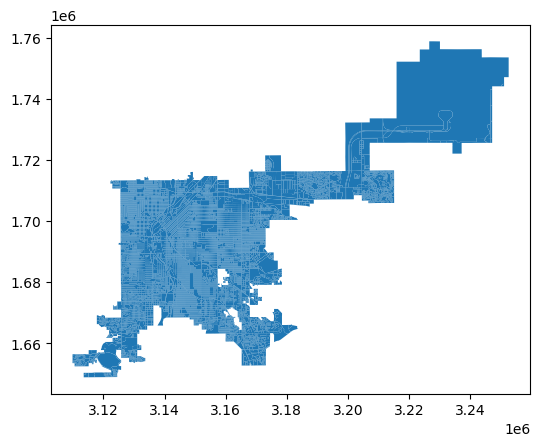

In [48]:
blocks_df.plot()

### But here are the "original" precinct files, extracted from statewide Colorado precinct files.
### (Sources: 2016 precinct file was compiled by VEST; 2018 precinct file was compiled by Haley Colgate with assistance from Todd Blees of the Colorado State Demographer's office, and 2020 file was compiled by Louis Pino of the Colorado State Legislative staff.)

In [49]:
precincts2016_orig_df = gpd.read_file("../examples/Shapefiles/DenverCo_precincts2016_orig/DenverCo_precincts2016_orig.shp")
precincts2018_orig_df = gpd.read_file("../examples/Shapefiles/DenverCo_precincts2018_orig/DenverCo_precincts2018_orig.shp")
precincts2020_orig_df = gpd.read_file("../examples/Shapefiles/DenverCo_precincts2020_orig/DenverCo_precincts2020_orig.shp")

In [50]:
maup.doctor(precincts2020_orig_df)

100%|████████████████████████████████████████| 356/356 [00:00<00:00, 826.87it/s]


There are 27 overlaps.
There are 33 holes.


False

### When we assigned blocks to precincts above, every block was assigned to a precinct; we can confirm this by checking for unassigned blocks:

In [51]:
print(len(blocks_df[blocks_to_precincts2020_assignment.isna()]))
print(len(blocks_df[blocks_to_precincts2018_assignment.isna()]))
print(len(blocks_df[blocks_to_precincts2016_assignment.isna()]))

0
0
0


### But what if we assign blocks to the original versions?

In [52]:
blocks_to_precincts2020_orig_assignment = maup.assign(blocks_df.geometry, precincts2020_orig_df.geometry)
blocks_to_precincts2018_orig_assignment = maup.assign(blocks_df.geometry, precincts2018_orig_df.geometry)
blocks_to_precincts2016_orig_assignment = maup.assign(blocks_df.geometry, precincts2016_orig_df.geometry)

100%|███████████████████████████████████████| 346/346 [00:00<00:00, 1501.18it/s]


In [53]:
print(len(blocks_df[blocks_to_precincts2020_orig_assignment.isna()]))
print(len(blocks_df[blocks_to_precincts2018_orig_assignment.isna()]))
print(len(blocks_df[blocks_to_precincts2016_orig_assignment.isna()]))

3
1
5


### So they all missed a few!

In [54]:
blocks_df[blocks_to_precincts2020_orig_assignment.isna()]

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,CD116,SLDL20,SLDU20,CD118,SLDL22,SLDU22,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,TOTPOP20,WHITE20,BLACK20,AMIN20,ASIAN20,NHPI20,OTHER20,2MORE20,HISP20,NH_WHITE20,NH_BLACK20,NH_AMIN20,NH_ASIAN20,NH_NHPI20,NH_OTHER20,NH_2MORE20,VAP20,HVAP20,WVAP20,BVAP20,AMINVAP20,ASIANVAP20,NHPIVAP20,OTHERVAP20,2MOREVAP20,H_WHITE20,H_BLACK20,H_AMIN20,H_ASIAN20,H_NHPI20,H_OTHER20,H_2MORE20,TOTPOP20R,HISP20R,NHWHITE20R,NHBLACK20R,NHAMIN20R,NHASIAN20R,NH_NHPI20R,NHOTHER20R,NH2MORE20R,WHITE20R,BLACK20R,AMIN20R,ASIAN20R,NHPI20R,OTHER20R,2MORE20R,geometry,PRES16D,PRES16R,SEN16D,SEN16R,AG18D,AG18R,SOS18D,SOS18R,TRE18D,TRE18R,GOV18D,GOV18R,REG18D,REG18R,PRES20D,SEN20D,PRES20R,SEN20R
2896,08,031,980001,1037,080319800011037,Block 1037,1,7,33,1,7,33,G5040,S,2113,25620,+39.8260443,-104.6282154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3244624.987 1726684.593, 3244656.485...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6683,08,031,980001,1039,080319800011039,Block 1039,1,7,33,1,7,33,G5040,S,70552,0,+39.8245484,-104.6206486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3246737.729 1727192.367, 3247192.322...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8656,08,031,980001,1038,080319800011038,Block 1038,1,7,33,1,7,33,G5040,S,237358,0,+39.8247377,-104.6244984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3244825.443 1726402.364, 3244867.095...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
blocks_df[blocks_to_precincts2018_orig_assignment.isna()]

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,CD116,SLDL20,SLDU20,CD118,SLDL22,SLDU22,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,TOTPOP20,WHITE20,BLACK20,AMIN20,ASIAN20,NHPI20,OTHER20,2MORE20,HISP20,NH_WHITE20,NH_BLACK20,NH_AMIN20,NH_ASIAN20,NH_NHPI20,NH_OTHER20,NH_2MORE20,VAP20,HVAP20,WVAP20,BVAP20,AMINVAP20,ASIANVAP20,NHPIVAP20,OTHERVAP20,2MOREVAP20,H_WHITE20,H_BLACK20,H_AMIN20,H_ASIAN20,H_NHPI20,H_OTHER20,H_2MORE20,TOTPOP20R,HISP20R,NHWHITE20R,NHBLACK20R,NHAMIN20R,NHASIAN20R,NH_NHPI20R,NHOTHER20R,NH2MORE20R,WHITE20R,BLACK20R,AMIN20R,ASIAN20R,NHPI20R,OTHER20R,2MORE20R,geometry,PRES16D,PRES16R,SEN16D,SEN16R,AG18D,AG18R,SOS18D,SOS18R,TRE18D,TRE18R,GOV18D,GOV18R,REG18D,REG18R,PRES20D,SEN20D,PRES20R,SEN20R
9812,08,031,008388,2009,080310083882009,Block 2009,1,7,33,1,7,33,G5040,S,1611,0,+39.7728637,-104.8004050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3196304.708 1707166.383, 3197014.777...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
blocks_df[blocks_to_precincts2016_orig_assignment.isna()]

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,CD116,SLDL20,SLDU20,CD118,SLDL22,SLDU22,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,TOTPOP20,WHITE20,BLACK20,AMIN20,ASIAN20,NHPI20,OTHER20,2MORE20,HISP20,NH_WHITE20,NH_BLACK20,NH_AMIN20,NH_ASIAN20,NH_NHPI20,NH_OTHER20,NH_2MORE20,VAP20,HVAP20,WVAP20,BVAP20,AMINVAP20,ASIANVAP20,NHPIVAP20,OTHERVAP20,2MOREVAP20,H_WHITE20,H_BLACK20,H_AMIN20,H_ASIAN20,H_NHPI20,H_OTHER20,H_2MORE20,TOTPOP20R,HISP20R,NHWHITE20R,NHBLACK20R,NHAMIN20R,NHASIAN20R,NH_NHPI20R,NHOTHER20R,NH2MORE20R,WHITE20R,BLACK20R,AMIN20R,ASIAN20R,NHPI20R,OTHER20R,2MORE20R,geometry,PRES16D,PRES16R,SEN16D,SEN16R,AG18D,AG18R,SOS18D,SOS18R,TRE18D,TRE18R,GOV18D,GOV18R,REG18D,REG18R,PRES20D,SEN20D,PRES20R,SEN20R
1997,08,031,008388,7008,080310083887008,Block 7008,1,7,33,1,7,33,G5040,S,10239,0,+39.7729509,-104.8078405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3193984.432 1707215.315, 3193983.602...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,08,031,008388,7007,080310083887007,Block 7007,1,7,33,1,7,33,G5040,S,1466,0,+39.7731435,-104.8088405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3194032.231 1707250.650, 3194531.988...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,08,031,015600,2004,080310156002004,Block 2004,1,2,32,1,1,32,G5040,S,3049,2100,+39.6658476,-105.0041615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3139496.394 1667748.388, 3139520.253...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8262,08,031,008388,7009,080310083887009,Block 7009,1,7,33,1,7,33,G5040,S,6260,0,+39.7729837,-104.8051077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3194531.881 1707232.230, 3194531.988...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9812,08,031,008388,2009,080310083882009,Block 2009,1,7,33,1,7,33,G5040,S,1611,0,+39.7728637,-104.8004050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((3196304.708 1707166.383, 3197014.777...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### In this case the unassigned blocks have zero population and zero votes, so they wouldn't affect the aggregation/disaggregation of data - but this isn't always the case.

### MORAL: Shapefiles often come with significant topological problems that can affect data transfer in important ways!  These problems should be diagnosed and repaired to the greatest extent possible prior to moving data around. 
### For details about how Maup can repair these problems, see the "Maup smart_repair demo" notebook!